In [3]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_df = pd.read_csv('/content/drive/MyDrive/YeniSeri/house-price-prediction/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/YeniSeri/house-price-prediction/test.csv')

#Set plot style
sns.set(style="whitegrid")
print("Train Shape:", train_df.shape)
train_df.head()


Train Shape: (1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

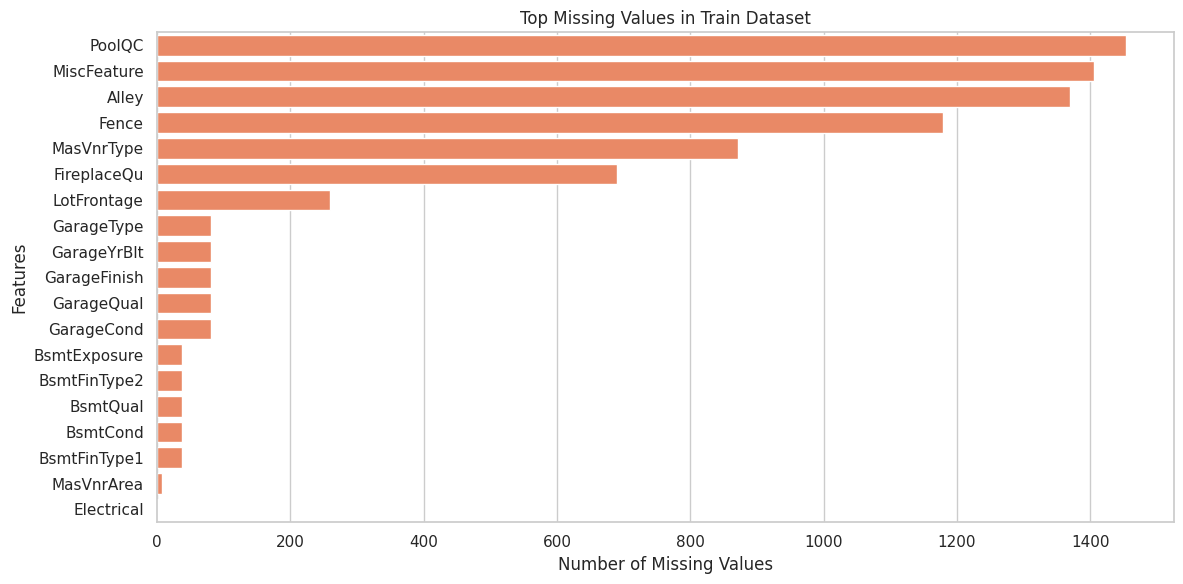

In [9]:
# Visualizing missing values as a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=missing.values, y=missing.index, color="coral")
plt.title("Top Missing Values in Train Dataset")
plt.xlabel("Number of Missing Values")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

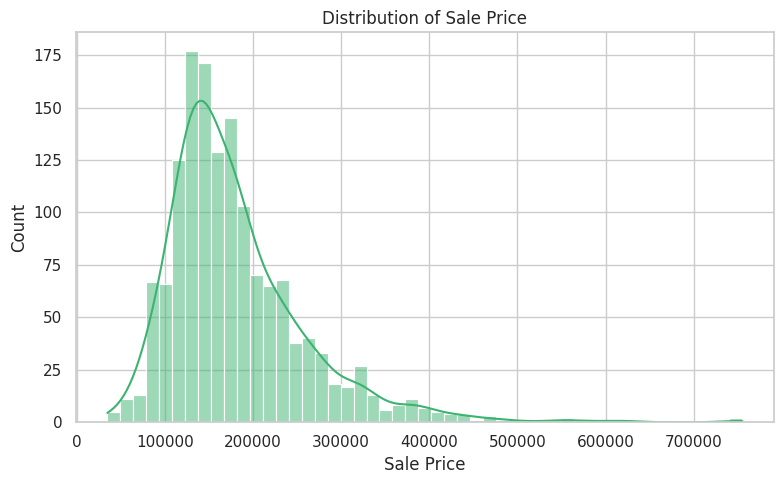

In [13]:
# Distribution of the target variable 'SalePrice'
plt.figure(figsize=(8, 5))
sns.histplot(train_df['SalePrice'], kde=True, color='mediumseagreen')
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


Skewness after log transform: 0.121


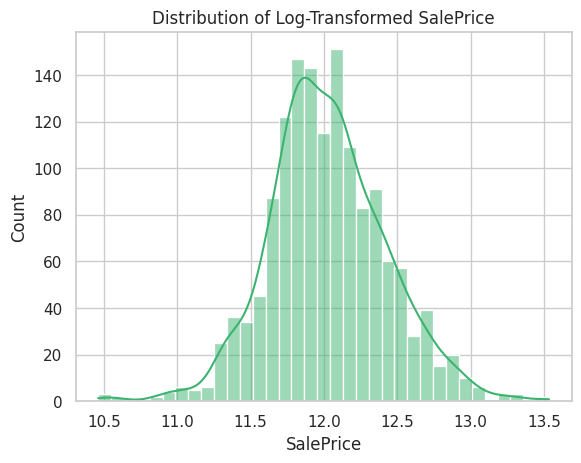

In [15]:
# Log transform SalePrice to reduce skewness
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])

# Skewness after transformation
print(f"Skewness after log transform: {train_df['SalePrice'].skew():.3f}")

# Histogram plot after transformation
sns.histplot(train_df['SalePrice'], kde=True, color='mediumseagreen')
plt.title('Distribution of Log-Transformed SalePrice')
plt.show()

In [16]:
# Compute correlation matrix (numeric features only)
corr_matrix = train_df.corr(numeric_only=True)

# Correlation with target variable 'SalePrice'
corr_with_target = corr_matrix['SalePrice'].sort_values(ascending=False)

# Show top 10 most correlated features
print(corr_with_target.head(11))  # SalePrice + en yüksek 10 özellik


SalePrice       1.000000
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
YearRemodAdd    0.565608
GarageYrBlt     0.541073
Name: SalePrice, dtype: float64


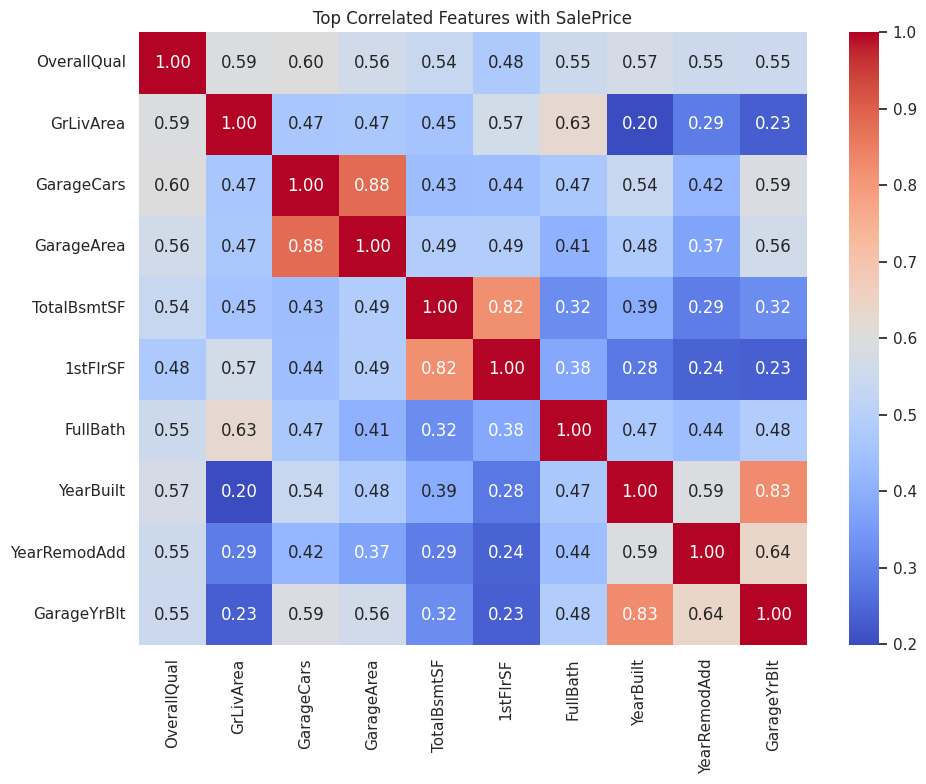

In [17]:
# Select the top correlated features (excluding SalePrice itself)
top_features = corr_with_target.index[1:11]  # SalePrice is first, skip it.

# Plot heatmap of these features
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[top_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Top Correlated Features with SalePrice")
plt.tight_layout()
plt.show()


In [8]:
#Check for missing values in the dataset
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64

In [21]:
# Delete more than %80 missing
threshold = 0.8
missing_ratio = train_df.isnull().sum() / len(train_df)
cols_to_drop = missing_ratio[missing_ratio > threshold].index
train_df.drop(cols_to_drop, axis=1, inplace=True)

In [26]:
# Fill numerical columns with median
numerical_cols = train_df.select_dtypes(include=["int64", "float64"]).columns

for col in numerical_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna(train_df[col].median(), inplace=True)


/tmp/ipython-input-2469336276.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].median(), inplace=True)


In [27]:
# Fill categorical columns with "None"
categorical_cols = train_df.select_dtypes(include=["object"]).columns

for col in categorical_cols:
    if train_df[col].isnull().sum() > 0:
        train_df[col].fillna("None", inplace=True)


/tmp/ipython-input-176101706.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna("None", inplace=True)


In [28]:
train_df.isnull().sum().sort_values(ascending=False).head()


Id             0
MSSubClass     0
MSZoning       0
LotFrontage    0
LotArea        0
dtype: int64

In [29]:
train_df_encoded = pd.get_dummies(train_df, drop_first=True)


In [31]:
from sklearn.model_selection import train_test_split

# Target variable: SalePrice
y = train_df_encoded['SalePrice']

# Feature matrix:
X = train_df_encoded.drop('SalePrice', axis=1)

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
# Fill missing numerical values with the median from the train set
for col in test_df.select_dtypes(include=["int64", "float64"]).columns:
    test_df[col] = test_df[col].fillna(train_df[col].median())

# Fill missing categorical values with "None"
for col in test_df.select_dtypes(include=["object"]).columns:
    test_df[col] = test_df[col].fillna("None")

# Apply One-Hot Encoding to test data
test_df_encoded = pd.get_dummies(test_df, drop_first=True)

#  Align test data columns with train data columns by adding missing columns with zeros
missing_cols = set(train_df_encoded.columns) - set(test_df_encoded.columns)
for col in missing_cols:
    test_df_encoded[col] = 0  # Add missing columns with zero values

# Reorder test data columns to match train data (except target column)
test_df_encoded = test_df_encoded[train_df_encoded.columns.drop('SalePrice')]


In [36]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [37]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

y_val_pred = lr_model.predict(X_val)

mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print(f"Validation RMSE: {rmse:.4f}")
print(f"Validation R2 Score: {r2:.4f}")


Validation RMSE: 0.2108
Validation R2 Score: 0.7618


In [38]:
test_predictions = lr_model.predict(test_df_encoded)


In [41]:
submission = pd.DataFrame({
    "Id": test_df["Id"],
    "SalePrice": test_predictions
})

submission.to_csv("submission.csv", index=False)
print(submission.head())



     Id  SalePrice
0  1461   8.931638
1  1462   9.182649
2  1463   9.326562
3  1464   9.405782
4  1465   9.397719


In [42]:
from google.colab import files
files.download('submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>